<a href="https://colab.research.google.com/github/Jayasri001/Task--1-Students-grade-classification/blob/main/task_1_classification_algorthim_for_studensts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#Importing the dataset

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [6]:
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [7]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [8]:
df["lunch"].value_counts()


standard        645
free/reduced    355
Name: lunch, dtype: int64

In [9]:
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [10]:
df = df.rename(columns={'race/ethnicity': 'grades','parental level of education':'level of education'})
df

,gender,grades,level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [11]:
df2 = df[(df["level of education"] =="master's degree") & (df['grades'] == 'group A')]
df2.shape

(3, 8)

In [12]:
df3 = df[(df["level of education"] =="some college") & (df['grades'] == 'group A')]
df3.shape

(18, 8)

In [13]:
df4 = df[(df["level of education"] =="high school") & (df['grades'] == 'group A')]
df4.shape

(18, 8)

In [14]:
	
df4 = df[(df["level of education"] =="associate's degree") & (df['grades'] == 'group A')]
df4.shape

(14, 8)

In [15]:
grouping = df.groupby(['gender']).agg(['min','median','max'])
grouping


math score             reading score  ...      writing score            
              min median  max           min  ...  max           min median  max
gender                                       ...                               
female          0   65.0  100            17  ...  100            10   74.0  100
male           27   69.0  100            23  ...  100            15   64.0  100

[2 rows x 9 columns]

In [16]:
df.groupby(['lunch','gender']).agg('median')

math score  reading score  writing score
lunch        gender                                          
free/reduced female        57.0           67.0           68.0
             male          62.0           61.0           59.0
standard     female        67.0           75.0           76.0
             male          72.0           67.5           67.0

In [17]:
df.groupby(["level of education"]).agg('median')

,math score,reading score,writing score
level of education,,,
associate's degree,67.0,72.5,70.5
bachelor's degree,68.0,73.0,74.0
high school,63.0,66.0,64.0
master's degree,73.0,76.0,75.0
some college,67.5,70.5,70.0
some high school,65.0,67.0,66.0


#Data visualisation

In [18]:
df1 = df.iloc[:,0:5]


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

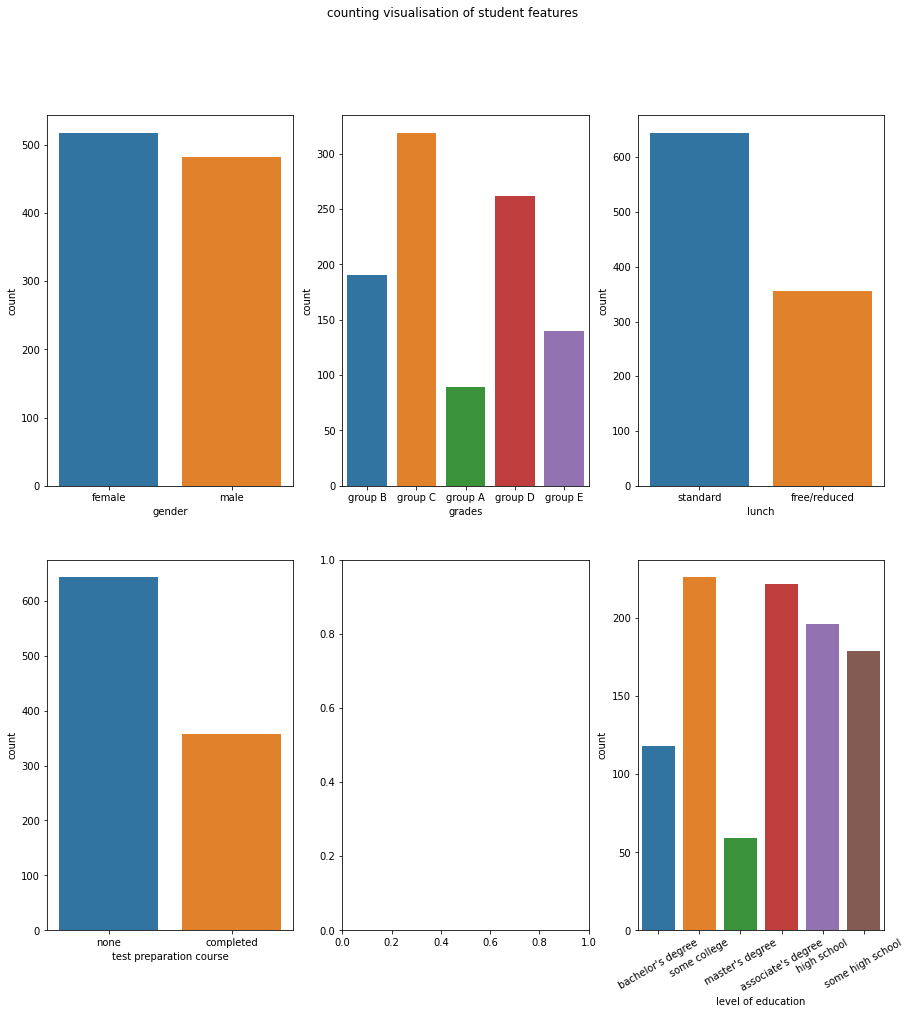

In [19]:
fig, axes = plt.subplots(2,3,figsize=(15,15))

fig .suptitle("counting visualisation of student features")
sns.countplot(ax=axes[0, 0], data=df, x='gender')
sns.countplot(ax=axes[0, 1], data=df, x='grades')

sns.countplot(ax=axes[0,2], data=df, x='lunch')
sns.countplot(ax=axes[1,0],data = df, x ='test preparation course' )
sns.countplot(ax=axes[1, 2], data=df, x='level of education')
plt.xticks(rotation = 30)



##bar plots grade vs numerical variable

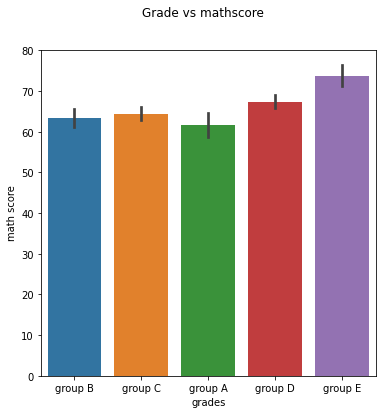

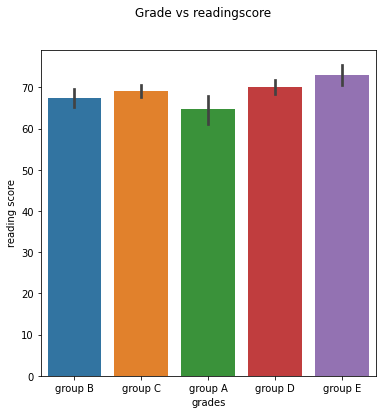

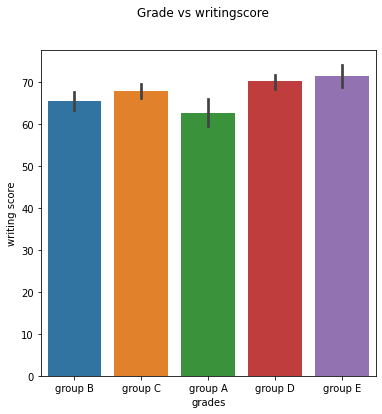

In [20]:
fig, axes = plt.subplots(figsize=(6,6))
fig .suptitle("Grade vs mathscore")
sns.barplot(x ="grades" ,y ="math score",data = df);
plt.show();
fig, axes = plt.subplots(figsize=(6,6))
fig .suptitle("Grade vs readingscore")
sns.barplot( x = "grades" ,y ="reading score",data = df);
plt.show();
fig, axes = plt.subplots(figsize=(6,6))
fig .suptitle("Grade vs writingscore")
sns.barplot(x = "grades" ,y ="writing score",data = df);
plt.show();

##bar plots gender vs numerical variable

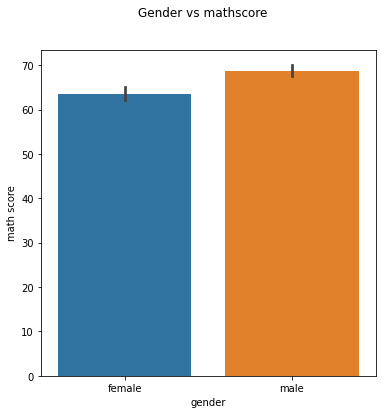

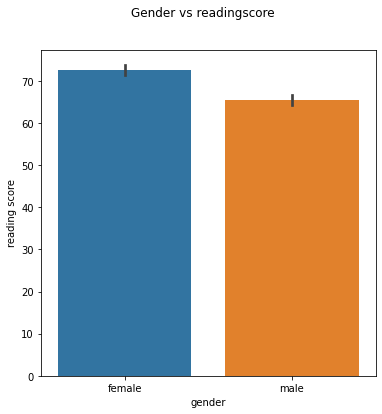

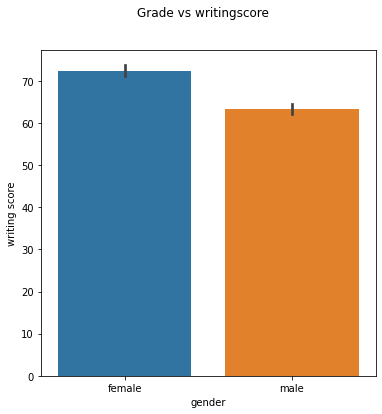

In [21]:
fig, axes = plt.subplots(figsize=(6,6))
fig .suptitle("Gender vs mathscore")
sns.barplot(x ="gender" ,y ="math score",data = df);
plt.show();
fig, axes = plt.subplots(figsize=(6,6))
fig .suptitle("Gender vs readingscore")
sns.barplot( x = "gender" ,y ="reading score",data = df);
plt.show();
fig, axes = plt.subplots(figsize=(6,6))
fig .suptitle("Grade vs writingscore")
sns.barplot(x = "gender" ,y ="writing score",data = df);
plt.show();

##box plot for outliers

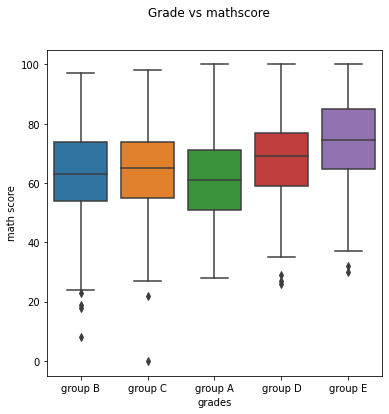

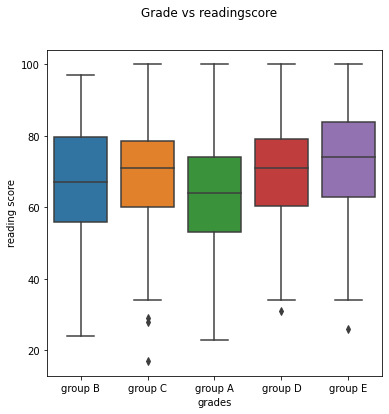

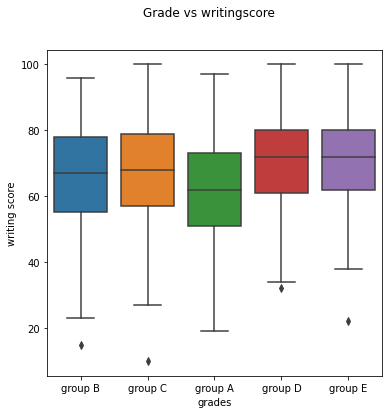

In [22]:
fig, axes = plt.subplots(figsize=(6,6))
fig .suptitle("Grade vs mathscore")
sns.boxplot(x ="grades" ,y ="math score",data = df);
plt.show();
fig, axes = plt.subplots(figsize=(6,6))
fig .suptitle("Grade vs readingscore")
sns.boxplot( x = "grades" ,y ="reading score",data = df);
plt.show();
fig, axes = plt.subplots(figsize=(6,6))
fig .suptitle("Grade vs writingscore")
sns.boxplot(x = "grades" ,y ="writing score",data = df);
plt.show();

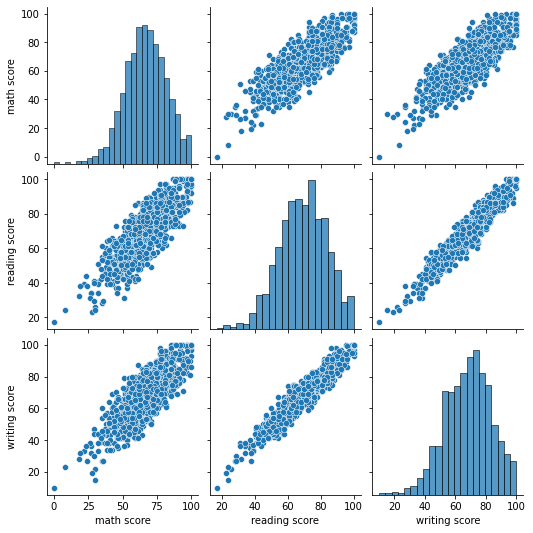

In [23]:
sns.pairplot(data = df)

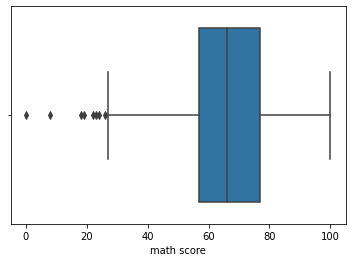

In [24]:
sns.boxplot(x = "math score",data = df)

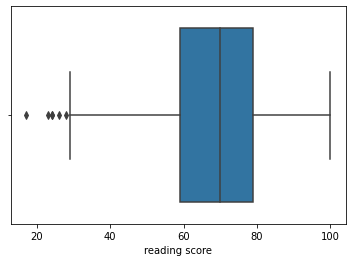

In [25]:
sns.boxplot(x = "reading score",data = df)


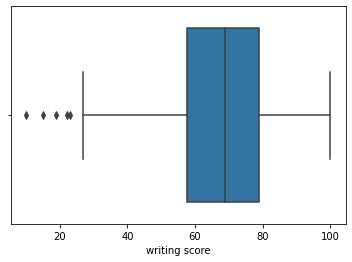

In [26]:
sns.boxplot(x = "writing score",data = df)

#correlation matrix

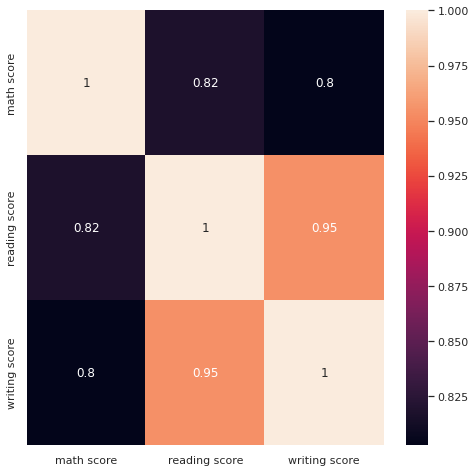

In [27]:
correlation = df.corr()
sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap((df.corr()),annot=True)


#training the model to get correct grade

In [28]:
df['total'] = df["reading score"]+ df["writing score"]+df["math score"]
df["percent"] = df['total']/3
df['pass_reading'] = np.where(df['reading score']< 50, 'Fail', 'Pass')
df['pass_writing'] = np.where(df['writing score']< 50, 'Fail', 'Pass')
df['pass_math'] = np.where(df['math score']< 50, 'Fail', 'Pass')

df

,gender,grades,level of education,lunch,test preparation course,math score,reading score,writing score,total,percent,pass_reading,pass_writing,pass_math
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Pass,Fail,Fail
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Pass,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,Pass,Pass,Pass
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,Pass,Pass,Pass
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,Pass,Pass,Pass
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,Pass,Pass,Pass


In [29]:
df['evaluation'] = df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' and 
                           x['pass_reading'] == 'Fail'and x['pass_writing'] == 'Fail'
                           else 'Pass', axis = 1)
df['evaluation'].value_counts()

Pass    945
Fail     55
Name: evaluation, dtype: int64

In [30]:
def grades(percent,evaluation):
    if (evaluation == "Fail"):
        return 'E'
    elif (percent >= 90):
        return "A"
    elif (percent >= 70):
        return 'B'
    elif (percent >=60):
        return 'C'
    elif (percent >=50):
        return 'D'
    else:
        return 'E'
df['grades'] = df.apply(lambda x: grades(x['percent'], x['evaluation']), axis = 1 )
df['grades'].value_counts()

B    407
C    256
D    182
E    103
A     52
Name: grades, dtype: int64

#label-hot-encoding

In [31]:
df['grades'] = df['grades'].replace({"A":1,"B":2,"C":3,"D":4,"E":5})
df

,gender,grades,level of education,lunch,test preparation course,math score,reading score,writing score,total,percent,pass_reading,pass_writing,pass_math,evaluation
0,female,2,bachelor's degree,standard,none,72,72,74,218,72.666667,Pass,Pass,Pass,Pass
1,female,2,some college,standard,completed,69,90,88,247,82.333333,Pass,Pass,Pass,Pass
2,female,1,master's degree,standard,none,90,95,93,278,92.666667,Pass,Pass,Pass,Pass
3,male,5,associate's degree,free/reduced,none,47,57,44,148,49.333333,Pass,Fail,Fail,Pass
4,male,2,some college,standard,none,76,78,75,229,76.333333,Pass,Pass,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,1,master's degree,standard,completed,88,99,95,282,94.000000,Pass,Pass,Pass,Pass
996,male,4,high school,free/reduced,none,62,55,55,172,57.333333,Pass,Pass,Pass,Pass
997,female,3,high school,free/reduced,completed,59,71,65,195,65.000000,Pass,Pass,Pass,Pass
998,female,2,some college,standard,completed,68,78,77,223,74.333333,Pass,Pass,Pass,Pass


In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["level of education"]= le.fit_transform(df["level of education"])
df["lunch"]= le.fit_transform(df["lunch"])
df["test preparation course"] = le.fit_transform(df["test preparation course"])
df["gender"] = le.fit_transform(df["gender"])
df["pass_math"] = le.fit_transform(df["pass_math"])
df["pass_reading"] = le.fit_transform(df["pass_reading"])
df["pass_writing"] = le.fit_transform(df["pass_writing"])
df['evaluation'] = le.fit_transform(df["evaluation"])
df

,gender,grades,level of education,lunch,test preparation course,math score,reading score,writing score,total,percent,pass_reading,pass_writing,pass_math,evaluation
0,0,2,1,1,1,72,72,74,218,72.666667,1,1,1,1
1,0,2,4,1,0,69,90,88,247,82.333333,1,1,1,1
2,0,1,3,1,1,90,95,93,278,92.666667,1,1,1,1
3,1,5,0,0,1,47,57,44,148,49.333333,1,0,0,1
4,1,2,4,1,1,76,78,75,229,76.333333,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,3,1,0,88,99,95,282,94.000000,1,1,1,1
996,1,4,2,0,1,62,55,55,172,57.333333,1,1,1,1
997,0,3,2,0,0,59,71,65,195,65.000000,1,1,1,1
998,0,2,4,1,0,68,78,77,223,74.333333,1,1,1,1


In [33]:
df.corr()

,gender,grades,level of education,lunch,test preparation course,math score,reading score,writing score,total,percent,pass_reading,pass_writing,pass_math,evaluation
gender,1.000000,0.145221,0.001913,0.021372,-0.006028,0.167982,-0.244313,-0.301225,-0.130861,-0.130861,-0.123218,-0.176647,0.094114,-0.030637
grades,0.145221,1.000000,0.062951,-0.278601,0.250018,-0.855400,-0.915231,-0.912698,-0.939917,-0.939917,-0.572667,-0.630725,-0.617611,-0.468745
level of education,0.001913,0.062951,1.000000,0.006320,-0.023968,-0.068279,-0.072444,-0.084299,-0.078883,-0.078883,-0.057824,-0.052647,-0.043833,-0.060616
lunch,0.021372,-0.278601,0.006320,1.000000,0.017044,0.350877,0.229560,0.245769,0.290064,0.290064,0.139110,0.134997,0.294002,0.178520
test preparation course,-0.006028,0.250018,-0.023968,0.017044,1.000000,-0.177702,-0.241780,-0.312946,-0.256710,-0.256710,-0.118222,-0.162848,-0.124095,-0.106957
math score,0.167982,-0.855400,-0.068279,0.350877,-0.177702,1.000000,0.817580,0.802642,0.918746,0.918746,0.474038,0.510142,0.655150,0.474912
reading score,-0.244313,-0.915231,-0.072444,0.229560,-0.241780,0.817580,1.000000,0.954598,0.970331,0.970331,0.594368,0.602931,0.533378,0.494845
writing score,-0.301225,-0.912698,-0.084299,0.245769,-0.312946,0.802642,0.954598,1.000000,0.965667,0.965667,0.566165,0.633768,0.541469,0.491533
total,-0.130861,-0.939917,-0.078883,0.290064,-0.256710,0.918746,0.970331,0.965667,1.000000,1.000000,0.572080,0.611820,0.606694,0.511904
percent,-0.130861,-0.939917,-0.078883,0.290064,-0.256710,0.918746,0.970331,0.965667,1.000000,1.000000,0.572080,0.611820,0.606694,0.511904


#Splitting the dataset

In [34]:
#x = df1.drop(columns = ["grades"]).values
x = df.drop(columns = ["grades"]).values
y = df.iloc[:,1].values
x

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 4., 1., ..., 1., 1., 1.],
       [0., 3., 1., ..., 1., 1., 1.],
       ...,
       [0., 2., 0., ..., 1., 1., 1.],
       [0., 4., 1., ..., 1., 1., 1.],
       [0., 4., 0., ..., 1., 1., 1.]])

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2,shuffle=False)

##scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit_transform(x_train,x_test)

array([[-0.96905014, -0.78162612,  0.72231512, ...,  0.36426101,
         0.39384707,  0.24943031],
       [-0.96905014,  0.84514776,  0.72231512, ...,  0.36426101,
         0.39384707,  0.24943031],
       [-0.96905014,  0.3028898 ,  0.72231512, ...,  0.36426101,
         0.39384707,  0.24943031],
       ...,
       [-0.96905014, -0.78162612,  0.72231512, ...,  0.36426101,
         0.39384707,  0.24943031],
       [-0.96905014, -1.32388408,  0.72231512, ...,  0.36426101,
         0.39384707,  0.24943031],
       [ 1.03193835, -0.23936816, -1.38443731, ...,  0.36426101,
         0.39384707,  0.24943031]])

In [37]:
y_train.shape

(700,)

#classification models

##logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr',solver='liblinear')
lrmodel = lr.fit(x_train,y_train)
y_pred = lrmodel.predict(x_test)
y_pred


array([2, 3, 2, 3, 3, 3, 5, 3, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 5, 5, 2, 2, 3, 2, 5, 2, 5, 2, 5, 3, 3, 2, 3, 2, 3, 2, 4, 2, 2,
       4, 2, 2, 3, 3, 2, 2, 3, 2, 2, 4, 2, 3, 2, 3, 2, 3, 4, 2, 3, 3, 2,
       2, 3, 2, 3, 5, 2, 3, 2, 3, 4, 2, 5, 2, 2, 4, 2, 2, 3, 2, 5, 2, 5,
       3, 3, 4, 3, 2, 2, 4, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3,
       4, 5, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 3, 3, 3, 2, 3, 3, 2,
       3, 2, 4, 3, 3, 2, 3, 2, 5, 3, 5, 2, 4, 2, 2, 3, 3, 2, 3, 3, 2, 2,
       3, 2, 2, 2, 5, 2, 3, 2, 5, 2, 2, 2, 4, 5, 2, 4, 4, 2, 2, 2, 4, 2,
       2, 3, 3, 2, 3, 2, 2, 5, 3, 2, 2, 3, 2, 5, 2, 2, 3, 2, 3, 5, 5, 2,
       3, 2, 2, 2, 5, 2, 2, 2, 4, 2, 2, 3, 5, 2, 3, 4, 4, 2, 2, 4, 2, 2,
       2, 5, 3, 3, 2, 3, 3, 3, 5, 4, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 2, 4, 4, 2, 2, 2, 2, 3, 3, 3, 2, 2, 4, 2, 3, 4, 2, 2,
       3, 3, 3, 3, 2, 2, 2, 2, 3, 4, 3, 2, 3, 3, 5, 2, 5, 2, 2, 2, 2, 4,
       4, 2, 5, 2, 2, 2, 2, 2, 3, 2, 4, 2, 2, 2])

In [39]:
print({"testscore":lrmodel.score(x_test,y_test), "trainscore":  lrmodel.score(x_train,y_train)})

{'testscore': 0.7733333333333333, 'trainscore': 0.8014285714285714}


In [40]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7733333333333333

In [41]:
lrc = confusion_matrix(y_test, y_pred)
lrc

array([[  0,  17,   0,   0,   0],
       [  0, 121,   2,   0,   0],
       [  0,  18,  53,   0,   0],
       [  0,   0,  29,  30,   0],
       [  0,   0,   0,   2,  28]])

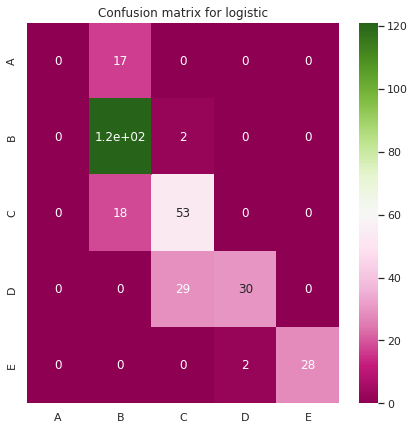

In [62]:
sns.set(rc = {'figure.figsize':(7,7)})
ax= plt.subplot()
sns.heatmap(lrc, annot=True,cmap="PiYG",ax=ax)
plt.title("Confusion matrix for logistic")
ax.xaxis.set_ticklabels(['A', 'B','C','D','E']); ax.yaxis.set_ticklabels(['A', 'B','C','D','E']);
plt.show()

In [60]:
resultlr = classification_report(y_test,y_pred)
print(resultlr)

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        17
           2       0.93      0.96      0.94       123
           3       0.76      0.87      0.81        71
           4       0.91      0.66      0.76        59
           5       1.00      0.87      0.93        30

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.86       300
weighted avg       0.88      0.87      0.87       300



##Decision tree

In [42]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=0,max_depth = 1)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=1, random_state=0)

In [43]:
y_preddt = dt.predict(x_test)

In [44]:
print({"testscore":dt.score(x_test,y_test), "trainscore":  dt.score(x_train,y_train)})

{'testscore': 0.6466666666666666, 'trainscore': 0.67}


In [63]:
dtc = confusion_matrix(y_test, y_pred)
dtc

array([[ 17,   0,   0,   0,   0],
       [  5, 118,   0,   0,   0],
       [  0,   9,  62,   0,   0],
       [  0,   0,  20,  39,   0],
       [  0,   0,   0,   4,  26]])

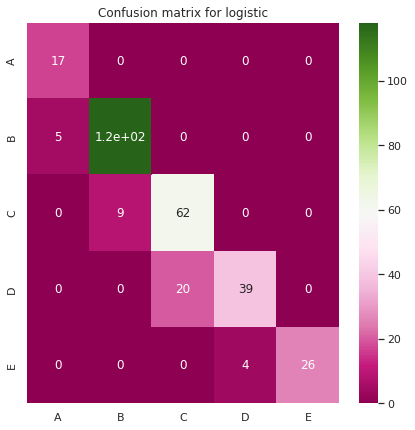

In [64]:
sns.set(rc = {'figure.figsize':(7,7)})
ax= plt.subplot()
sns.heatmap(dtc, annot=True,cmap="PiYG",ax=ax)
plt.title("Confusion matrix for Decision")
ax.xaxis.set_ticklabels(['A', 'B','C','D','E']); ax.yaxis.set_ticklabels(['A', 'B','C','D','E']);
plt.show()

In [69]:
resultdtc = classification_report(y_test,y_preddt)
print(resultdtc)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.88      1.00      0.94       123
           3       0.44      1.00      0.61        71
           4       0.00      0.00      0.00        59
           5       0.00      0.00      0.00        30

    accuracy                           0.65       300
   macro avg       0.26      0.40      0.31       300
weighted avg       0.47      0.65      0.53       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.model_selection import cross_val_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = tree.DecisionTreeClassifier(max_depth=depth) 
  dt.fit(x_train, y_train) 
  trainAccuracy = accuracy_score(y_train, dt.predict(x_train)) 
  dt = tree.DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, x, y, cv=10)
  print(depth, trainAccuracy, np.mean(valAccuracy))

1 0.67 0.663
2 0.8957142857142857 0.897
3 1.0 1.0
4 1.0 1.0
5 1.0 1.0
6 1.0 1.0
7 1.0 1.0
8 1.0 1.0
9 1.0 1.0
10 1.0 1.0
20 1.0 1.0
40 1.0 1.0
60 1.0 1.0


##Randomforest

In [70]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(max_depth=10, random_state=0)
random.fit(x_train, y_train)
y_predr = random.predict(x_test)


In [47]:
print({"testscore":random.score(x_test,y_test), "trainscore":  random.score(x_train,y_train)})

{'testscore': 1.0, 'trainscore': 1.0}


In [72]:
randomr = confusion_matrix(y_test, y_predr)
randomr

array([[ 17,   0,   0,   0,   0],
       [  0, 123,   0,   0,   0],
       [  0,   0,  71,   0,   0],
       [  0,   0,   0,  59,   0],
       [  0,   0,   0,   0,  30]])

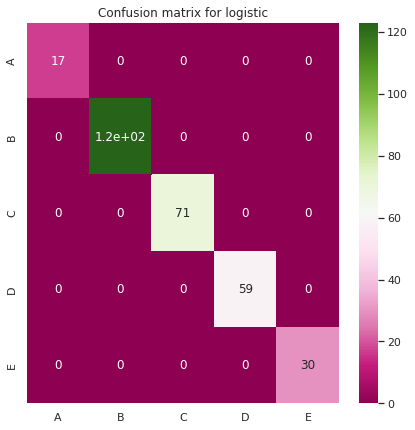

In [74]:
sns.set(rc = {'figure.figsize':(7,7)})
ax= plt.subplot()
sns.heatmap(randomr, annot=True,cmap="PiYG",ax=ax)
plt.title("Confusion matrix for Random")
ax.xaxis.set_ticklabels(['A', 'B','C','D','E']); ax.yaxis.set_ticklabels(['A', 'B','C','D','E']);
plt.show()

In [78]:
random_report = classification_report(y_test,y_predr)
print(random_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00       123
           3       1.00      1.00      1.00        71
           4       1.00      1.00      1.00        59
           5       1.00      1.00      1.00        30

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



##Knn

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

1.0

In [82]:
y_predknn = knn.predict(x_test)

In [83]:
print({"testscore":knn.score(x_test,y_test), "trainscore":  knn.score(x_train,y_train)})

{'testscore': 0.9766666666666667, 'trainscore': 1.0}


In [84]:
knnc = confusion_matrix(y_test, y_predknn)
knnc

array([[ 17,   0,   0,   0,   0],
       [  1, 121,   1,   0,   0],
       [  0,   2,  69,   0,   0],
       [  0,   0,   1,  57,   1],
       [  0,   0,   0,   1,  29]])

In [86]:
resultknn = classification_report(y_test,y_predknn)
print(resultknn)

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        17
           2       0.98      0.98      0.98       123
           3       0.97      0.97      0.97        71
           4       0.98      0.97      0.97        59
           5       0.97      0.97      0.97        30

    accuracy                           0.98       300
   macro avg       0.97      0.98      0.97       300
weighted avg       0.98      0.98      0.98       300



In [52]:
from sklearn.model_selection import cross_val_score
for k in [1,2,3,4,5,6,7,8,9,10,20,40,80,100,200]:
  knn = KNeighborsClassifier(n_neighbors=k)
  print("K value : ", k, "score : ", cross_val_score(knn,x,y,cv = 10, scoring = 'accuracy').mean())

K value :  1 score :  0.975
K value :  2 score :  0.967
K value :  3 score :  0.97
K value :  4 score :  0.97
K value :  5 score :  0.9809999999999999
K value :  6 score :  0.984
K value :  7 score :  0.984
K value :  8 score :  0.983
K value :  9 score :  0.99
K value :  10 score :  0.986
K value :  20 score :  0.982
K value :  40 score :  0.9800000000000001
K value :  80 score :  0.96
K value :  100 score :  0.923
K value :  200 score :  0.8320000000000001


##naivebayes

In [88]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_predgb =gaussian.predict(x_test)


In [89]:
nbmatrix = confusion_matrix(y_test,y_predgb)

In [91]:
resultng = classification_report(y_test,y_predgb)
print(resultng)

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        17
           2       0.93      0.96      0.94       123
           3       0.76      0.87      0.81        71
           4       0.91      0.66      0.76        59
           5       1.00      0.87      0.93        30

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.86       300
weighted avg       0.88      0.87      0.87       300



In [54]:
print({"testscore":gaussian.score(x_test,y_test), "trainscore":  gaussian.score(x_train,y_train)})

{'testscore': 0.8733333333333333, 'trainscore': 0.8828571428571429}
